### 反洗錢系統
透過SVM 分類異常帳戶與非異常帳戶<br>
分類哪筆資料可能是可疑(詐欺)帳戶<br>
<br>
資料來源<br>
https://www.kaggle.com/code/x09072993/aml-detection/data

In [2]:
# 套件匯入
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [5]:

# 设置随机种子
random.seed(50)
print(random.seed(50))
# 导入数据集
dataset = pd.read_csv('./input/PS_20174392719_1491204439457_log.csv')
dataset.drop('nameOrig', axis=1, inplace=True)
dataset.drop('nameDest', axis=1, inplace=True)
dataset.drop('isFlaggedFraud', axis=1, inplace=True)


None


In [7]:
dataset

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


### 資料前處理

In [3]:
sample_dataframe = dataset.sample(n=100000)
X = sample_dataframe.iloc[:, :-1].values
y = sample_dataframe.iloc[:, 7].values

print(sample_dataframe.isFraud.value_counts())

0    99853
1      147
Name: isFraud, dtype: int64


In [11]:
# 编码分类数据
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import scipy.sparse
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])
onehotencoder = ColumnTransformer(
    [('encoder', OneHotEncoder(), [1])])
X = onehotencoder.fit_transform(X).toarray()

# 避免虚拟变量陷阱(Dummy Variable Trap)
# https: // www.cnblogs.com/HuZihu/p/11330853.html  # :~:text=%E8%99%9A%E6%8B%9F%E5%8F%98%E9%87%8F%E9%99%B7%E9%98%B1%EF%BC%88Dummy%20Variable%20Trap%EF%BC%89.%20%E8%99%9A%E6%8B%9F%E5%8F%98%E9%87%8F%E9%99%B7%E9%98%B1%EF%BC%88Dummy%20Variable%20Trap%EF%BC%89%20%EF%BC%9A%E6%8C%87%E5%BD%93%E5%8E%9F%E7%89%B9%E5%BE%81%E6%9C%89m%E4%B8%AA%E7%B1%BB%E5%88%AB%E6%97%B6%EF%BC%8C%E5%A6%82%E6%9E%9C%E5%B0%86%E5%85%B6%E8%BD%AC%E6%8D%A2%E6%88%90m%E4%B8%AA%E8%99%9A%E6%8B%9F%E5%8F%98%E9%87%8F%EF%BC%8C%E5%B0%B1%E4%BC%9A%E5%AF%BC%E8%87%B4%E5%8F%98%E9%87%8F%E9%97%B4%E5%87%BA%E7%8E%B0%E5%AE%8C%E5%85%A8%E5%85%B1%E7%BA%BF%E6%80%A7%E7%9A%84%E6%83%85%E5%86%B5%E3%80%82.%20%E5%81%87%E8%AE%BE%E6%88%91%E4%BB%AC%E6%9C%89%E4%B8%80%E4%B8%AA%E7%89%B9%E5%BE%81%E2%80%9C%E6%80%A7%E5%88%AB%E2%80%9D%EF%BC%8C%E5%8C%85%E5%90%AB%E7%94%B7%E6%80%A7%E5%92%8C%E5%A5%B3%E6%80%A7%E4%B8%A4%E4%B8%AA%E7%B1%BB%E5%88%AB%EF%BC%8C%E5%A6%82%E6%9E%9C%E5%B0%86%E6%AD%A4%E7%89%B9%E5%BE%81%E8%BD%AC%E6%8D%A2%E4%B8%BA2%E4%B8%AA%E8%99%9A%E6%8B%9F%E5%8F%98%E9%87%8F%EF%BC%8C%E5%B0%B1%E6%98%AF%EF%BC%9A%E7%94%B7x,1%20x%201%20%2Bw%202%20x%202%20%2Bb%E3%80%82.
X = X[:, 1:]

In [12]:
# 将数据集拆分为训练集和测试集

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

counts = np.unique(y_train, return_counts=True)

In [13]:
# 特征缩放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)
print(counts)

(array([0, 1], dtype=int64), array([69894,   106], dtype=int64))


### 建構模型

In [14]:
# 将内核 SVM 拟合到训练集
from sklearn.svm import LinearSVC
from imblearn.under_sampling import NearMiss
from imblearn import over_sampling as os
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler

In [19]:
# 应用采样
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X_train, y_train)
count = np.unique(y_resampled, return_counts=True)

# 创建管道

pipeline4 = make_pipeline(ADASYN(),LinearSVC(random_state=1))
pipeline4.fit(X_train, y_train)
print(count)

(array([0, 1], dtype=int64), array([69894, 69854], dtype=int64))


### 訓練模型

In [16]:
# 分类并报告结果
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, pipeline4.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.56      1.00      0.72      0.75      0.53     14982
          1       0.00      1.00      0.56      0.01      0.75      0.58        18

avg / total       1.00      0.56      1.00      0.71      0.75      0.53     15000



In [17]:
# 制作混淆矩阵
from sklearn.metrics import confusion_matrix, precision_score,auc,roc_auc_score,roc_curve,recall_score
cm = confusion_matrix(y_val, pipeline4.predict(X_val))
roc = roc_auc_score(y_val, pipeline4.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, pipeline4.predict(X_val))
roc_auc = auc(fpr,tpr)

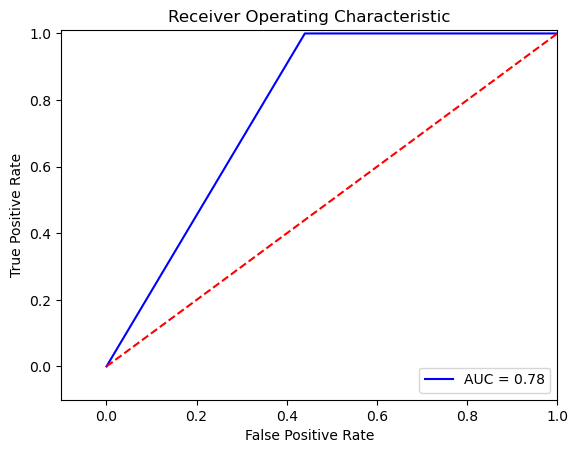

In [18]:
# 绘制 ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()